<a href="https://colab.research.google.com/github/Arman001/AutoPrice-AI/blob/main/notebooks/Car_Pricing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Pricing Prediction

## Importing Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
import lightgbm as lgb

pd.set_option('display.max_columns', None)


## Importing Cleaned Dataset

In [108]:
df_cars = pd.read_csv('cleaned_car_data.csv')

In [109]:
df_cars.head()

,brand,model_year,milage,engine,accident,price,log_price,fuel_type_E85 Flex Fuel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,ext_col_Blue,ext_col_Gray,ext_col_Green,ext_col_Orange/Bronze,ext_col_Other,ext_col_Purple,ext_col_Red,ext_col_Silver,ext_col_White,ext_col_Yellow/Gold,int_col_Black,int_col_Blue,int_col_Brown,int_col_Gray,int_col_Green,int_col_Other,int_col_Red,int_col_White,transmission_CVT,transmission_Manual,transmission_Other
0,11,2013,51000.0,300.0,1,10300.0,9.239899,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,16,2021,34742.0,3.8,1,38005.0,10.545473,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,23,2022,22372.0,3.5,0,54598.0,10.907753,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,17,2015,88900.0,354.0,0,15500.0,9.648595,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,2,2021,9835.0,2.0,0,34999.0,10.463075,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False


In [110]:
df_cars.columns

Index(['brand', 'model_year', 'milage', 'engine', 'accident', 'price',
       'log_price', 'fuel_type_E85 Flex Fuel', 'fuel_type_Electric',
       'fuel_type_Gasoline', 'fuel_type_Hybrid', 'fuel_type_Plug-In Hybrid',
       'ext_col_Blue', 'ext_col_Gray', 'ext_col_Green',
       'ext_col_Orange/Bronze', 'ext_col_Other', 'ext_col_Purple',
       'ext_col_Red', 'ext_col_Silver', 'ext_col_White', 'ext_col_Yellow/Gold',
       'int_col_Black', 'int_col_Blue', 'int_col_Brown', 'int_col_Gray',
       'int_col_Green', 'int_col_Other', 'int_col_Red', 'int_col_White',
       'transmission_CVT', 'transmission_Manual', 'transmission_Other'],
      dtype='object')

In [111]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     4009 non-null   int64  
 1   model_year                4009 non-null   int64  
 2   milage                    4009 non-null   float64
 3   engine                    4009 non-null   float64
 4   accident                  4009 non-null   int64  
 5   price                     4009 non-null   float64
 6   log_price                 4009 non-null   float64
 7   fuel_type_E85 Flex Fuel   4009 non-null   bool   
 8   fuel_type_Electric        4009 non-null   bool   
 9   fuel_type_Gasoline        4009 non-null   bool   
 10  fuel_type_Hybrid          4009 non-null   bool   
 11  fuel_type_Plug-In Hybrid  4009 non-null   bool   
 12  ext_col_Blue              4009 non-null   bool   
 13  ext_col_Gray              4009 non-null   bool   
 14  ext_col_

## Train Test Split

In [112]:
target = "log_price"
features = df_cars.drop(columns=[target,'price']).columns

In [113]:
X_train, X_test, y_train, y_test = train_test_split(df_cars[features], df_cars[target], test_size=0.2, random_state=42)

## Sclaing of Data

In [114]:
numerical_cols = ["model_year", "milage", "engine", "accident"]
categorical_cols = X_train.columns.difference(numerical_cols)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

X_train_final = pd.concat([X_train_scaled_df, X_train[categorical_cols]], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test[categorical_cols]], axis=1)



In [115]:
X_train_final.head()

,model_year,milage,engine,accident,brand,ext_col_Blue,ext_col_Gray,ext_col_Green,ext_col_Orange/Bronze,ext_col_Other,ext_col_Purple,ext_col_Red,ext_col_Silver,ext_col_White,ext_col_Yellow/Gold,fuel_type_E85 Flex Fuel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,int_col_Black,int_col_Blue,int_col_Brown,int_col_Gray,int_col_Green,int_col_Other,int_col_Red,int_col_White,transmission_CVT,transmission_Manual,transmission_Other
2473,0.404894,0.154635,-1.539452,1.757999,11,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
1338,1.233863,-1.048390,0.574073,-0.568828,12,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
1613,0.073307,-0.184876,0.994975,-0.568828,3,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False
1610,0.239101,0.235722,0.279443,-0.568828,23,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
2600,0.404894,-0.595937,-0.598437,1.757999,11,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


## Training and Testing

### Linear Regression

In [116]:
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)

LinearRegression()

In [117]:
y_pred_lr = lr_model.predict(X_test_final)

In [118]:
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print(f"📌 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"📌 R² Score: {r2:.4f}")


📌 Mean Absolute Error (MAE): 0.3880
📌 Root Mean Squared Error (RMSE): 0.5638
📌 R² Score: 0.5919


### Decision Tree

In [119]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [120]:
y_pred_dt = dt_model.predict(X_test)

In [121]:
mae = mean_absolute_error(y_test, y_pred_dt)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2 = r2_score(y_test, y_pred_dt)

print(f"📌 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"📌 R² Score: {r2:.4f}")


📌 Mean Absolute Error (MAE): 0.3547
📌 Root Mean Squared Error (RMSE): 0.5307
📌 R² Score: 0.6383


### Random Forest

In [122]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [123]:
y_pred_rf = rf_model.predict(X_test)

In [124]:
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print(f"📌 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"📌 R² Score: {r2:.4f}")


📌 Mean Absolute Error (MAE): 0.2619
📌 Root Mean Squared Error (RMSE): 0.3998
📌 R² Score: 0.7948


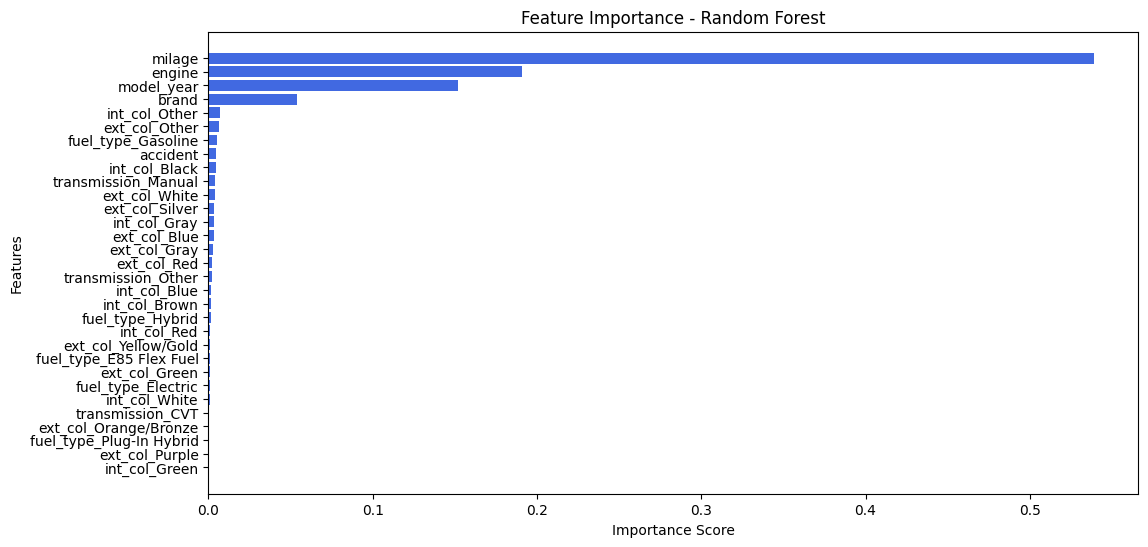

In [125]:
## feature importance

feature_importance = rf_model.feature_importances_


feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.show()

### XGBoost Regressor

In [126]:
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42 )
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [127]:
y_pred_xgb = xgb_model.predict(X_test)

In [128]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"📌 XGBoost MAE: {mae_xgb:.4f}")
print(f"📌 XGBoost RMSE: {rmse_xgb:.4f}")
print(f"📌 XGBoost R² Score: {r2_xgb:.4f}")

📌 XGBoost MAE: 0.2271
📌 XGBoost RMSE: 0.1321
📌 XGBoost R² Score: 0.8304


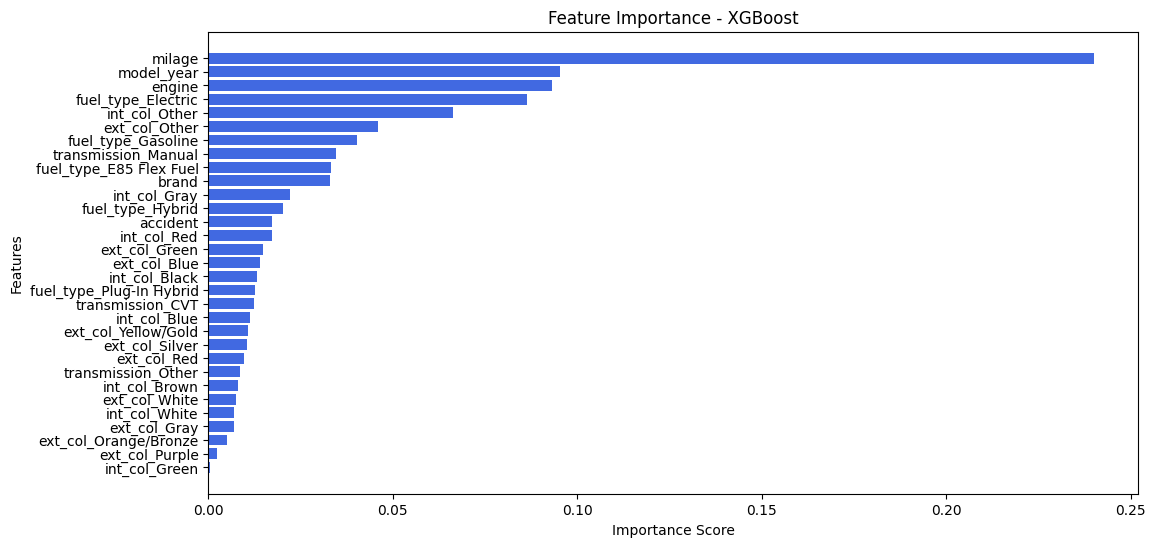

In [129]:
## feature importance

feature_importance = xgb_model.feature_importances_


feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - XGBoost")
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.show()

 98%|===================| 3153/3207 [00:30<00:00]       

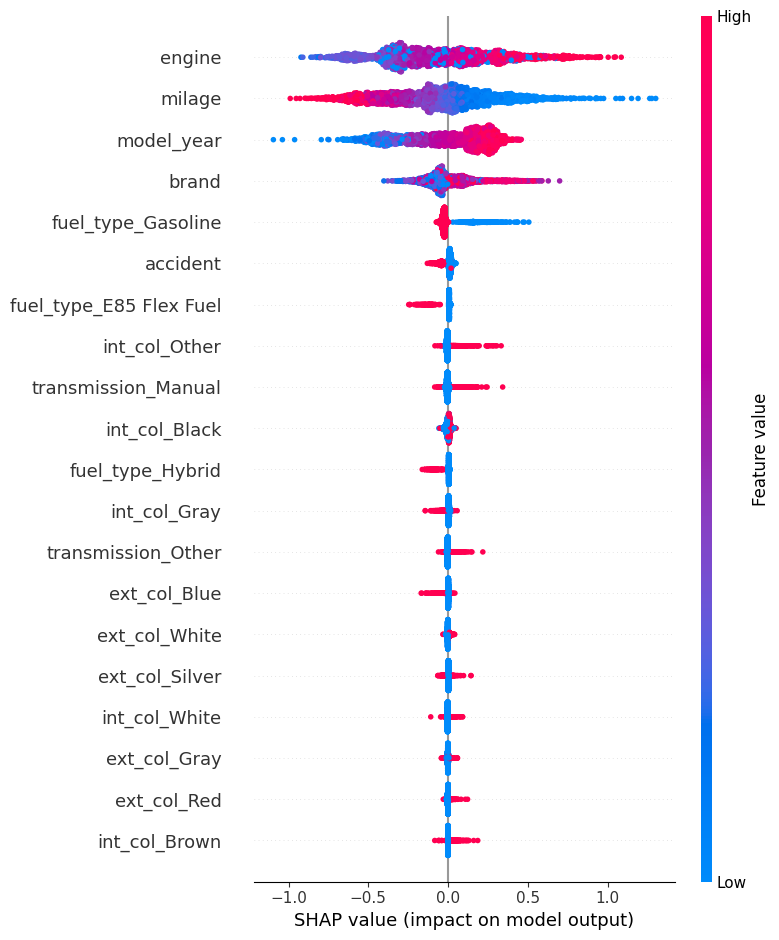

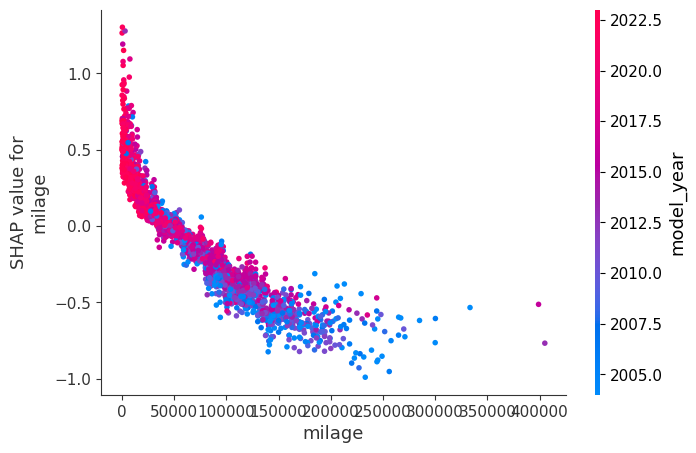

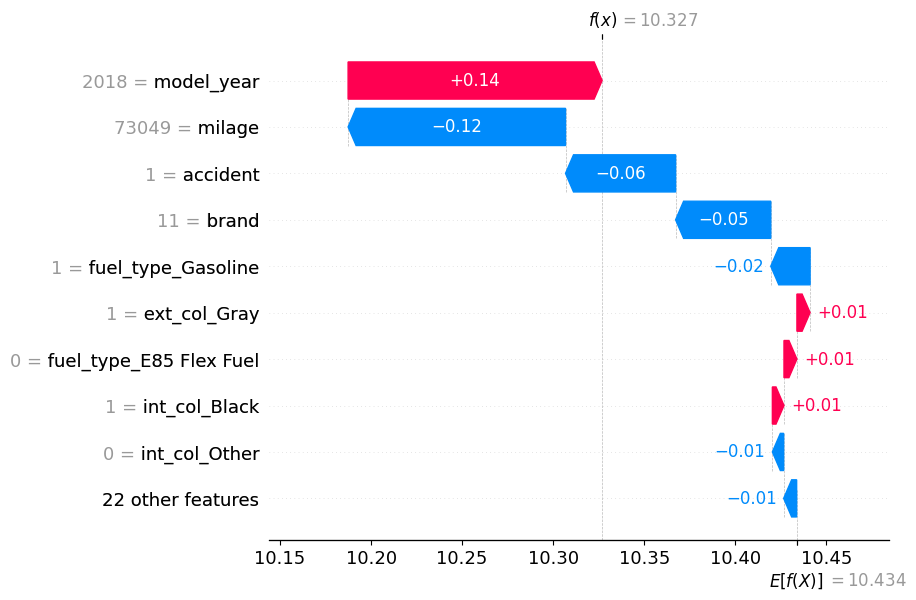

In [130]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.astype(float)

# Initialize the SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

# Summary plot (overall feature importance & direction)
shap.summary_plot(shap_values, X_train)

# Dependence Plot for Top Features (e.g., Mileage)
shap.dependence_plot("milage", shap_values.values, X_train)

# Waterfall Plot for a single instance (e.g., first sample)
shap.waterfall_plot(shap.Explanation(values=shap_values[0].values,
                                     base_values=shap_values[0].base_values,
                                     data=X_train.iloc[0]))